In [82]:
#Load the important libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Load the Dataset

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [84]:
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [85]:
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [86]:
test.shape

(1000, 7)

In [87]:
train.shape

(4000, 8)

In [88]:
train['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [89]:
# Checking for Null Values
train.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

#### Duplicates

*Let's see how many duplicates are in the data.*

In [90]:
print("Total number of examples in training data: ", train.shape[0])
print("Number of examples where we have a duplicate values: ", train.duplicated().sum())

Total number of examples in training data:  4000
Number of examples where we have a duplicate values:  58


There are 58 duplicates, now let's drop the duplicate values.

In [91]:
train = train.drop_duplicates().reset_index(drop=True)

In [92]:
print("Total number of examples in test data: ", test.shape[0])
print("Number of examples where we have a duplicate values: ", test.duplicated().sum())

Total number of examples in test data:  1000
Number of examples where we have a duplicate values:  3


In [93]:
# There are 03 duplicates, now let's drop the duplicate values

test = test.drop_duplicates().reset_index(drop=True)

## Exploratory Data Analysis

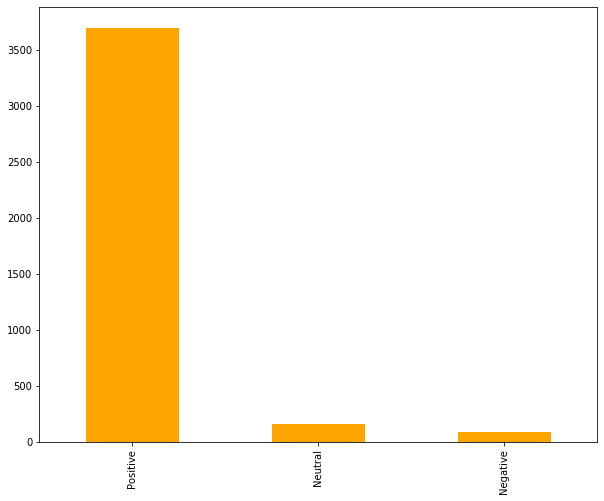

In [94]:
train['sentiment'].value_counts().plot.bar(color = 'orange', figsize = (10, 8))

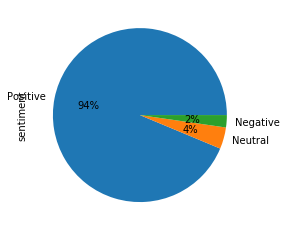

In [95]:
train['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

In [96]:
train.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [97]:
# Rename the columns

train.rename(columns = {'reviews.text':'reviews_text', 'reviews.title':'reviews_title','reviews.date':'reviews_date'}, inplace = True)

In [98]:
test.rename(columns = {'reviews.text':'reviews_text', 'reviews.title':'reviews_title','reviews.date':'reviews_date'}, inplace = True)

In [99]:
train.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date',
       'reviews_text', 'reviews_title', 'sentiment'],
      dtype='object')

In [100]:
test.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date',
       'reviews_text', 'reviews_title'],
      dtype='object')

## Story Generation and visualization from reviews

#### WORDCLOUD OF REVIEW TITLES

In [101]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

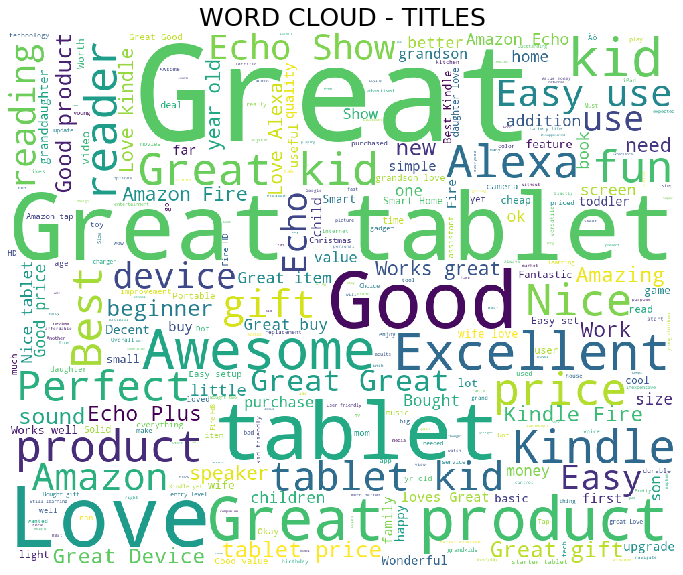

In [102]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,).generate(" ".join(train['reviews_title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

#### WORDCLOUDS OF REVIEW TEXT

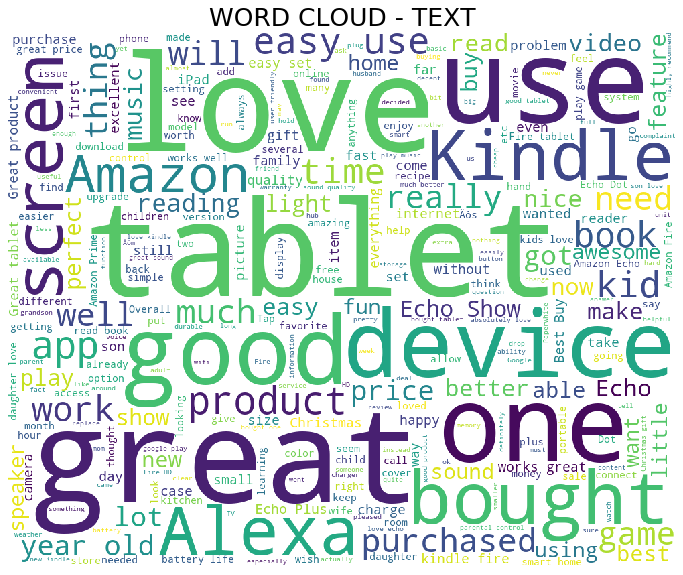

In [103]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,).generate(" ".join(train['reviews_text'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TEXT",fontsize=25)
plt.axis('off')
plt.show()

Now I am dropping the Neutral Sentiment, as My goal is to work on differentiate the positive and negative.

In [27]:
train = train[train.sentiment != "Neutral"]

***Now we are ready for a WordCloud visualization which shows only the most emphatic words of the Positive, Negative and Neutral sentiment.***

In [104]:
positive_sentiments = ''.join([text for text in train["reviews_text"][train['sentiment']=='Positive']])

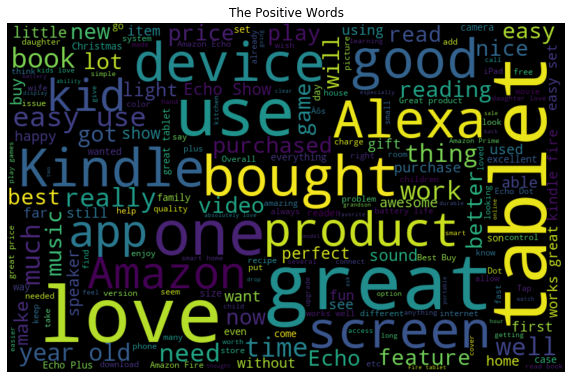

In [105]:
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [106]:
negative_sentiments = ''.join([text for text in train["reviews_text"][train['sentiment']=='Negative']])

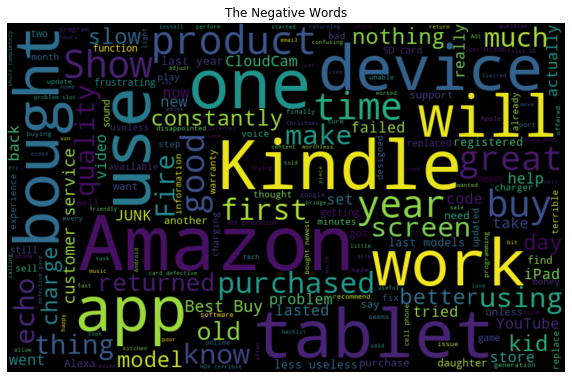

In [107]:
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [108]:
neutral_sentiments = ''.join([text for text in train["reviews_text"][train['sentiment']=='Neutral']])

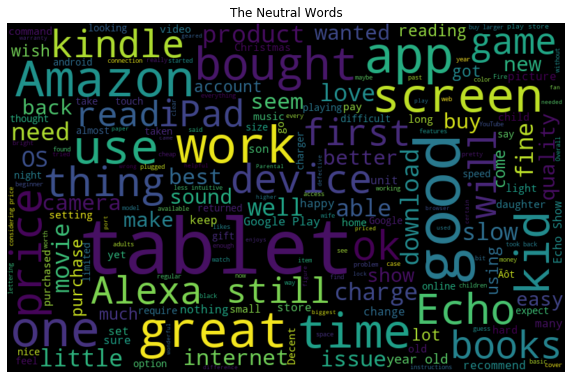

In [109]:
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

## Preparing Data

In [110]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re

from nltk.tokenize import RegexpTokenizer

In [111]:
import nltk
nltk.download("stopwords")

from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)

[nltk_data] Downloading package stopwords to C:\Users\SHIVAM
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
train.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date',
       'reviews_text', 'reviews_title', 'sentiment'],
      dtype='object')

In [113]:
test.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date',
       'reviews_text', 'reviews_title'],
      dtype='object')

In [114]:
train['reviews_title'] = train['reviews_title'].astype(str)
test['reviews_title'] = test['reviews_title'].astype(str)
train['reviews_title'] = train['reviews_title'].str.lower()
test['reviews_title'] = test['reviews_title'].str.lower()

train['reviews_text'] = train['reviews_text'].astype(str)
test['reviews_text'] = test['reviews_text'].astype(str)
train['reviews_text'] = train['reviews_text'].str.lower()
test['reviews_text'] = test['reviews_text'].str.lower()

In [115]:
train.head()

,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,purchased on black fridaypros - great price (e...,powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,i purchased two amazon in echo plus and two do...,amazon echo plus awesome,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,just an average alexa option. does show a few ...,average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. exactly what i wanted, and ...",greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,this is the 3rd one i've purchased. i've bough...,very durable!,Positive


In [116]:
train['reviews_text']= train['reviews_text'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
train['reviews_text']

0       purchased on black fridaypros   great price  e...
1       i purchased two amazon in echo plus and two do...
2       just an average alexa option  does show a few ...
3       very good product  exactly what i wanted  and ...
4       this is the  rd one i ve purchased  i ve bough...
                              ...                        
3937    it   s fun for the family to play with  but it...
3938    i love the kindle  it is a great product  it r...
3939    i was looking for a blutooth speaker to use wi...
3940    this is the second amazon fire   tablet i have...
3941    very satisfied with tablet  very fast and effi...
Name: reviews_text, Length: 3942, dtype: object

In [117]:
test['reviews_text']= test['reviews_text'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
test['reviews_text']

0      amazon kindle fire has a lot of free app and c...
1      the echo show is a great addition to the amazo...
2      great value from best buy  bought at christmas...
3      i use mine for email  facebook  games and to g...
4      this is a fantastic item   the person i bought...
                             ...                        
992    we love alexa  love being able to watch news b...
993    speaker is pretty loud and i love that i can t...
994    bought   of these for my   and   yr old and it...
995    was told by sales person i could come back in ...
996    i purchased this as a gift for my mother  her ...
Name: reviews_text, Length: 997, dtype: object

In [118]:
train['reviews_text'] = train['reviews_text'].map(lambda x: re.sub('\\n',' ',str(x)))
train['reviews_text'] = train['reviews_text'].map(lambda x: re.sub(r'\W',' ',str(x)))
train['reviews_text'] = train['reviews_text'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
train['reviews_text'] = train['reviews_text'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
train['reviews_text'] = train['reviews_text'].map(lambda x: re.sub(r'\s+',' ',str(x)))
train['reviews_text'] = train['reviews_text'].apply(lambda x: remove_stopwords(x))
train.head()

,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,purchased black fridaypros great price even sa...,powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,purchased two amazon echo plus two dots plus f...,amazon echo plus awesome,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,an average alexa option show things screen sti...,average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,good product exactly wanted very good price,greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,is rd one purchased bought one all my nieces o...,very durable!,Positive


In [119]:
test['reviews_text'] = test['reviews_text'].map(lambda x: re.sub('\\n',' ',str(x)))
test['reviews_text'] = test['reviews_text'].map(lambda x: re.sub(r'\W',' ',str(x)))
test['reviews_text'] = test['reviews_text'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
test['reviews_text'] = test['reviews_text'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
test['reviews_text'] = test['reviews_text'].map(lambda x: re.sub(r'\s+',' ',str(x)))
test['reviews_text'] = test['reviews_text'].apply(lambda x: remove_stopwords(x))
test.head()

,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,amazon kindle fire lot free app can used any o...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,echo show great addition amazon family works l...,another winner from amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,great value best buy bought christmas sale,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,use mine email facebook games to go line also ...,love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,is fantastic item person bought for loves,fantastic!


In [120]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
train['sentiment'] = labelEncoder.fit_transform(train['sentiment'])

In [121]:
train.head()

,name,brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,purchased black fridaypros great price even sa...,powerful tablet,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,purchased two amazon echo plus two dots plus f...,amazon echo plus awesome,2
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,an average alexa option show things screen sti...,average,1
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,good product exactly wanted very good price,greattttttt,2
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,is rd one purchased bought one all my nieces o...,very durable!,2


In [122]:
train = train.drop(['name', 'categories', 'reviews_date'], axis = 1)

In [123]:
train.head()

,brand,primaryCategories,reviews_text,reviews_title,sentiment
0,Amazon,Electronics,purchased black fridaypros great price even sa...,powerful tablet,2
1,Amazon,"Electronics,Hardware",purchased two amazon echo plus two dots plus f...,amazon echo plus awesome,2
2,Amazon,"Electronics,Hardware",an average alexa option show things screen sti...,average,1
3,Amazon,"Office Supplies,Electronics",good product exactly wanted very good price,greattttttt,2
4,Amazon,Electronics,is rd one purchased bought one all my nieces o...,very durable!,2


## Model Building

In [124]:
from sklearn.model_selection import train_test_split

target = train["sentiment"]
train2 = train.drop(['sentiment'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=1019)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer

In [126]:
vec = CountVectorizer()

In [127]:
X_train_counts = vec.fit_transform(train['reviews_text'])

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [128]:
X_train_tfidf.shape

(3942, 4748)

In [129]:
X_val_counts = vec.transform(x_val['reviews_text'])
X_val_tfidf = tfidf_transformer.transform(X_val_counts)

In [130]:
X_val_tfidf.shape

(1183, 4748)

In [131]:
test_counts = vec.transform(test['reviews_text'])
test_tfidf = tfidf_transformer.transform(test_counts)
print(test_tfidf.shape)

(997, 4748)


## Machine Learning Algorithm

### Logistic Regression

In [132]:
lnreg = LogisticRegression()

lnreg.fit(X_train_tfidf, target)

LogisticRegression()

In [133]:

y_pred_ln = lnreg.predict(X_val_tfidf)
y_pred_ln

array([2, 2, 2, ..., 2, 2, 2])

In [134]:
score = accuracy_score(y_val, y_pred_ln)
print('Accuracy Score:', score)

Accuracy Score: 0.9382924767540152


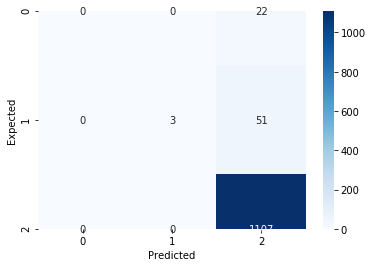

In [148]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_val, y_pred_ln)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## K Nearest Neighbor

In [136]:
knn = KNeighborsClassifier()

knn.fit(X_train_tfidf, target)

KNeighborsClassifier()

In [137]:
y_pred_knn = knn.predict(X_val_tfidf)
y_pred_knn

array([2, 2, 2, ..., 2, 2, 1])

In [138]:
score = accuracy_score(y_val, y_pred_knn)
print('Accuracy Score:', score)

Accuracy Score: 0.9492814877430262


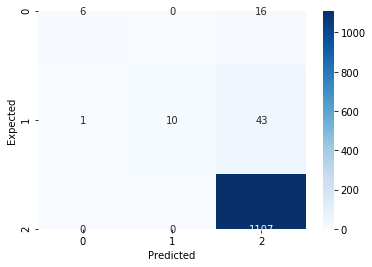

In [147]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_val, y_pred_knn)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Decision Tree 

In [140]:
dt = DecisionTreeClassifier()

dt.fit(X_train_tfidf, target)

DecisionTreeClassifier()

In [141]:
y_pred_dt = dt.predict(X_val_tfidf)
y_pred_dt

array([2, 2, 2, ..., 2, 2, 1])

In [142]:
score = accuracy_score(y_val, y_pred_dt)
print('Accuracy Score:', score)

Accuracy Score: 1.0


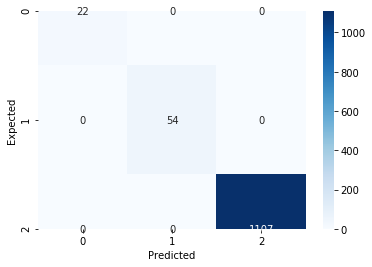

In [149]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_val, y_pred_dt)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Random Forest 

In [143]:
rf = RandomForestClassifier(n_estimators=200, random_state = 2020, verbose=1).fit(X_train_tfidf, target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished


In [144]:
y_pred_rf = rf.predict(X_val_tfidf)
y_pred_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


array([2, 2, 2, ..., 2, 2, 1])

In [145]:
score = accuracy_score(y_val, y_pred_rf)
print('Accuracy Score:', score)

Accuracy Score: 1.0


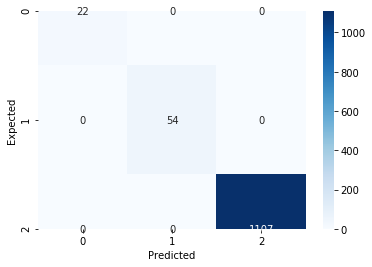

In [150]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_val, y_pred_rf)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()